<img src="https://www.cecodes.org.co/site/wp-content/uploads/2016/01/WP_asociado_COLSUBSIDIO-832x350.jpg" alt="Logo Colsubsidio" width=200>

## Cargue de paquetes y datos

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv("../Depuradas/Aportes.csv",encoding='latin1')

In [3]:
data.head(3)

,id_empresas,Aportes,Remanente,trabajadores,estadoprovinciaregion,formalegal,activostotales,activoscorrientes,pasivostotales,ingresosnetosporventas,rotaciondeactivos,apalancamiento,LogAportes,GrupoActividad,Grupodescripcionciiu
0,3383,40848720.0,8947314.4,10.0,Bogotá D.C,Persona Natural,2.06,0.58,0.35,2.17,3.820476,120.41,17.525386,e,f
1,4831,413752640.0,101844456.8,104.0,Bogotá D.C,Persona Natural,3.48,2.81,0.82,3.48,1.020000,130.93,19.840779,e,f
2,18030,2951680.0,1573969.6,3.0,Bogotá D.C,Persona Natural,5.88,0.51,0.27,5.88,9.680000,188.83,14.897885,e,f


Convertir variables a tipo categórico

In [4]:
categoricas=["estadoprovinciaregion","formalegal","GrupoActividad","Grupodescripcionciiu"]

for var in categoricas:
    data[var] = data[var].astype("category")

In [5]:
data.dtypes

id_empresas                  int64
Aportes                    float64
Remanente                  float64
trabajadores               float64
estadoprovinciaregion     category
formalegal                category
activostotales             float64
activoscorrientes          float64
pasivostotales             float64
ingresosnetosporventas     float64
rotaciondeactivos          float64
apalancamiento             float64
LogAportes                 float64
GrupoActividad            category
Grupodescripcionciiu      category
dtype: object

In [6]:
data=data.drop(["id_empresas", "LogAportes", "Remanente"], axis=1)

## Análisis Exploratorio

### Conteo de Valores Ausentes

In [7]:
data.apply(lambda x: x.isnull().sum(), axis=0)

Aportes                     0
trabajadores              143
estadoprovinciaregion       0
formalegal                  3
activostotales            228
activoscorrientes         349
pasivostotales            226
ingresosnetosporventas    349
rotaciondeactivos         349
apalancamiento            241
GrupoActividad              0
Grupodescripcionciiu        0
dtype: int64

Debido a que existen valores ausentes en la base de datos, se deberán imputar los valores ausentes. Este paso se realizará mas adelante en el conjunto de entrenamiento.

### Gráfico Pareado

C:\Users\hernyatt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\hernyatt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


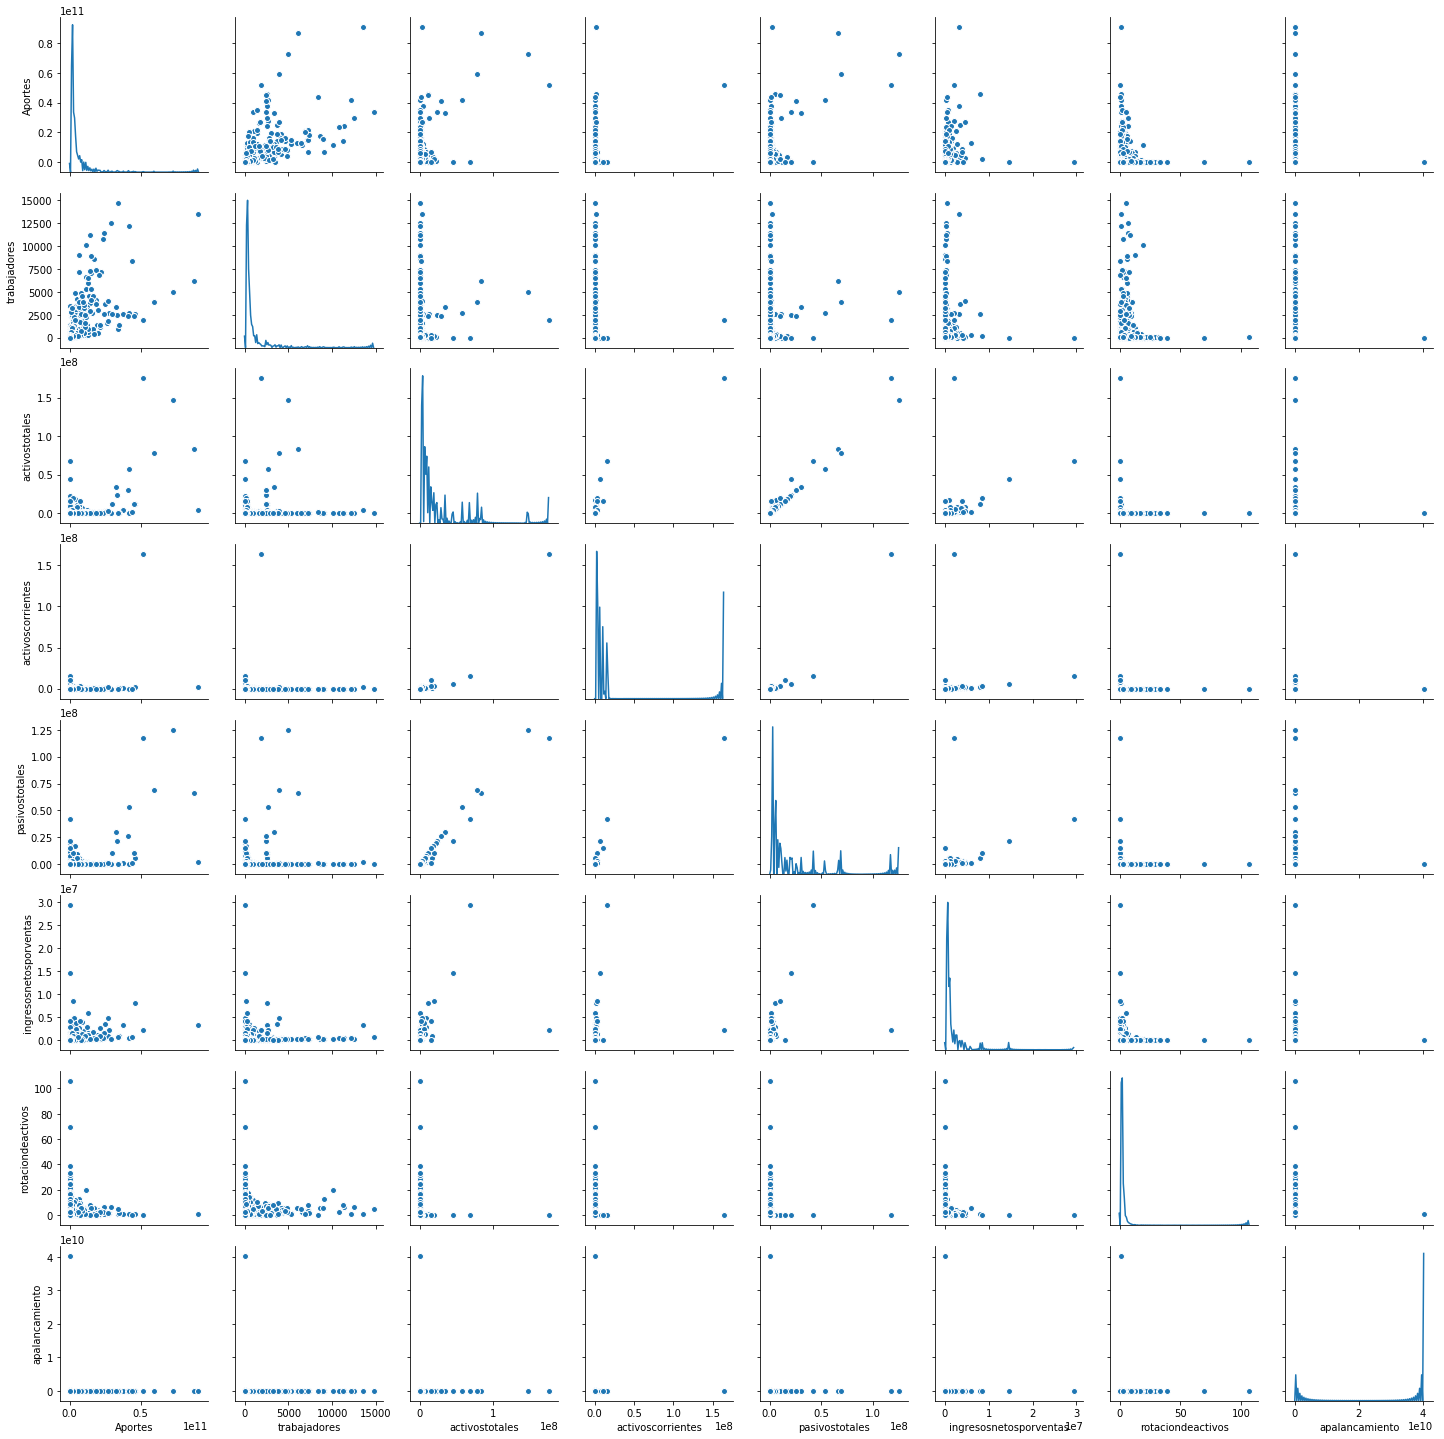

In [8]:
g = sns.pairplot(data, diag_kind ="kde")

### Matriz de Correlaciones

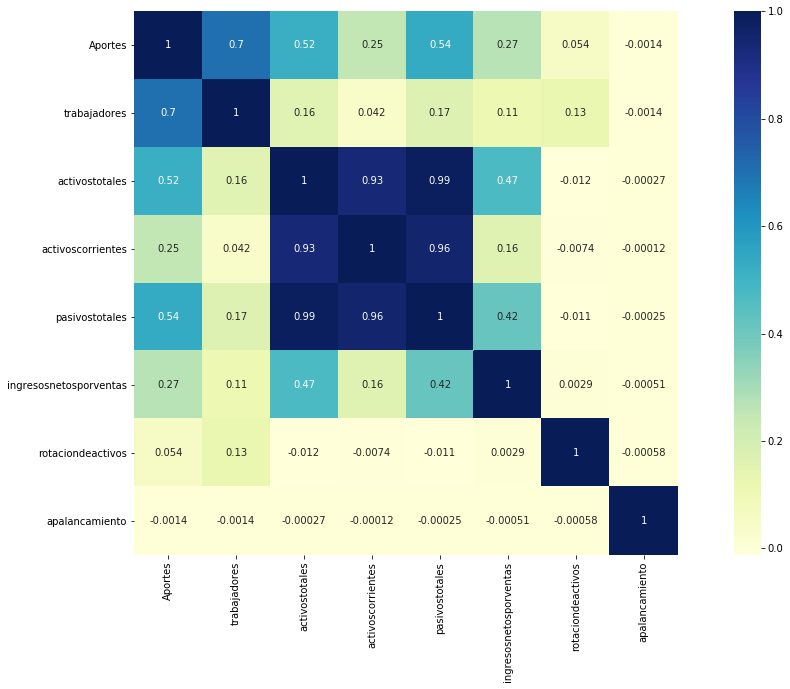

In [9]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(data.corr(), cmap="YlGnBu", square=True,annot=True)

### Diagramas de Cajas para variables categóricas

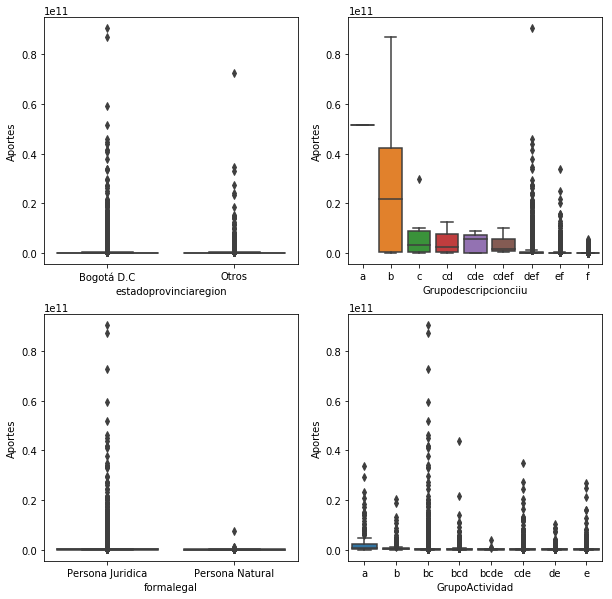

In [10]:
fig , axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)
sns.boxplot(data=data,y="Aportes",x="estadoprovinciaregion",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="Aportes",x="formalegal",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="Aportes",x="GrupoActividad",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="Aportes",x="Grupodescripcionciiu",orient="v",ax=axes[0][1])

Los valores de las agrupaciones de GrupoActividad y Grupodescripcionciiu fueron calculados con ruebas de Tukey en R

### Eliminación de datos Atípicos

Inicialmente se eliminarán los datos cuyos aportes estén 3 desviaciones por encima de la media de los aprotes

In [11]:
data_Out = data[np.abs(data["Aportes"]-data["Aportes"].mean())<=(3*data["Aportes"].std())]

In [12]:
print ("Datos con Outliers: ",data.shape)
print ("Datos sin Outliers ",data_Out.shape)

Datos con Outliers:  (16962, 12)
Datos sin Outliers  (16804, 12)


### Distribucion de la variable respuesta: Aportes

((array([-3.93703035, -3.71870646, -3.59914733, ...,  3.59914733,
          3.71870646,  3.93703035]),
  array([10.73641841, 11.18443529, 11.28979441, ..., 22.61642381,
         22.62328694, 22.62511923])),
 (1.5413028588485032, 17.88320628318145, 0.9939744440736736))

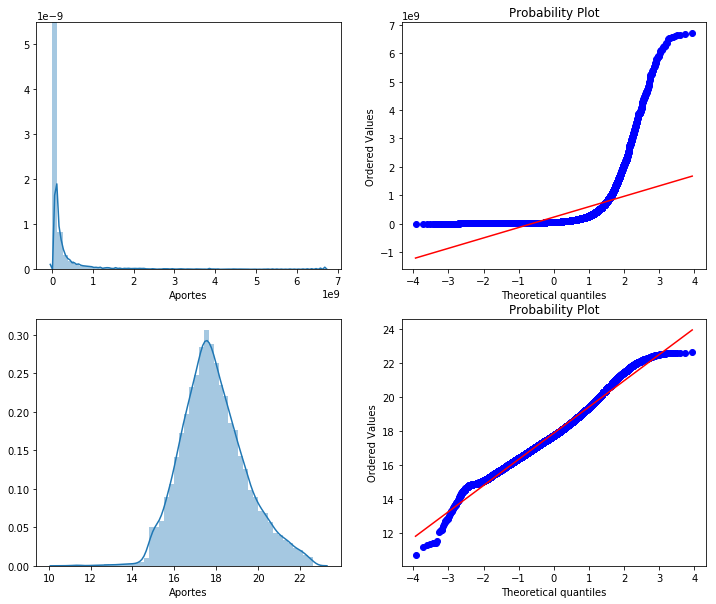

In [13]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(data_Out["Aportes"],ax=axes[0][0])
stats.probplot(data_Out["Aportes"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(data_Out["Aportes"]),ax=axes[1][0])
stats.probplot(np.log1p(data_Out["Aportes"]), dist='norm', fit=True, plot=axes[1][1])

Se decide trabajar con la variable aportes en escala logarítmica 

### Codificación de variables Categóricas

In [14]:
data_Out=pd.get_dummies(data_Out, columns=categoricas, prefix=["resid", "legal", "Act", "CIIU"])
data_Out.head(3)

,Aportes,trabajadores,activostotales,activoscorrientes,pasivostotales,ingresosnetosporventas,rotaciondeactivos,apalancamiento,resid_Bogotá D.C,resid_Otros,...,Act_e,CIIU_a,CIIU_b,CIIU_c,CIIU_cd,CIIU_cde,CIIU_cdef,CIIU_def,CIIU_ef,CIIU_f
0,40848720.0,10.0,2.06,0.58,0.35,2.17,3.820476,120.41,1,0,...,1,0,0,0,0,0,0,0,0,1
1,413752640.0,104.0,3.48,2.81,0.82,3.48,1.020000,130.93,1,0,...,1,0,0,0,0,0,0,0,0,1
2,2951680.0,3.0,5.88,0.51,0.27,5.88,9.680000,188.83,1,0,...,1,0,0,0,0,0,0,0,0,1


### Construccion de conjuntos Train y Test

In [15]:
X = data_Out.drop(["Aportes"], axis=1)
y = np.log(data_Out["Aportes"])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11762, 28) (5042, 28) (11762,) (5042,)


In [17]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_train)

X_train_imp=pd.DataFrame(imp.transform(X_train))
X_test_imp=pd.DataFrame(imp.transform(X_test))

### Estimación del Modelo

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LarsCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

models = {
    'rl': LinearRegression(normalize=True, n_jobs=-1)
    #,'ridge': RidgeCV(cv=10,alphas=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))
    #,'lasso': LassoCV(cv=10,alphas=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))
    #,'SGD': SGDRegressor()
    #,'LARS': LarsCV(n_jobs=-1)
    #,'Bay_Ridge': BayesianRidge()
    ,'AdaBoost': AdaBoostRegressor()
    ,'Bagging': BaggingRegressor(random_state=31415)
    ,'Trees': ExtraTreesRegressor(random_state=31415)
    ,'GradientBoosting': GradientBoostingRegressor(random_state=31415, n_estimators=500)
    ,'RandomForest': RandomForestRegressor(random_state=31415)
    ,'ExtraTrees': ExtraTreesRegressor(random_state=31415)
}

In [19]:
for model in models.keys():
    models[model].fit(X_train_imp, y_train)

In [20]:
y_pred = pd.DataFrame(index=X_test_imp.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test_imp)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

for model in models.keys():
    print(model, ": Error Cuadrático Medio: %.4f"
      % mean_squared_error(y_test,y_pred[model]))
    print(model, ": R Cuadrado: %.4f"
      % r2_score(y_test,y_pred[model]))

rl : Error Cuadrático Medio: 1.8206
rl : R Cuadrado: 0.2548
AdaBoost : Error Cuadrático Medio: 0.9548
AdaBoost : R Cuadrado: 0.6092
Bagging : Error Cuadrático Medio: 0.5989
Bagging : R Cuadrado: 0.7549
Trees : Error Cuadrático Medio: 0.6636
Trees : R Cuadrado: 0.7284
GradientBoosting : Error Cuadrático Medio: 0.5237
GradientBoosting : R Cuadrado: 0.7856
RandomForest : Error Cuadrático Medio: 0.6017
RandomForest : R Cuadrado: 0.7537
ExtraTrees : Error Cuadrático Medio: 0.6636
ExtraTrees : R Cuadrado: 0.7284


Se elige entonces el modelo GradientBoosting.

#### CV sobre el Modelo final

In [22]:
from sklearn.model_selection import cross_val_score
FinalMod=models['GradientBoosting']

n_cv=10
score=-(cross_val_score(FinalMod, X_train_imp, y_train, cv=n_cv, scoring='neg_mean_squared_error'))
print("train MSE: \n", pd.Series(score).describe(),"\n")

score=-(cross_val_score(FinalMod, X_test_imp, y_test, cv=n_cv, scoring='neg_mean_squared_error'))
print("test MSE: \n", pd.Series(score).describe())

train MSE: 
 count    10.000000
mean      0.511424
std       0.057550
min       0.411839
25%       0.483648
50%       0.499751
75%       0.563367
max       0.582490
dtype: float64 

test MSE: 
 count    10.000000
mean      0.553345
std       0.084371
min       0.423421
25%       0.511280
50%       0.543355
75%       0.581830
max       0.728461
dtype: float64


#### Métricas sobre los datos originales

In [23]:
X_imp=pd.DataFrame(imp.transform(X))

n_cv=20
score=-(cross_val_score(FinalMod, X_imp, y, cv=n_cv, scoring='neg_mean_squared_error'))
pd.Series(score).describe()

count    20.000000
mean      0.518625
std       0.115147
min       0.308073
25%       0.433301
50%       0.521402
75%       0.609684
max       0.732775
dtype: float64

In [24]:
from sklearn.externals import joblib
joblib.dump(FinalMod, '../Resultados/ModeloEmpresas.pkl')

['../Resultados/ModeloEmpresas.pkl']

# Calificación Nueva base de aportes

In [25]:
calif = pd.read_csv("../Calificaciones/Calificar.csv",encoding='latin1')

categoricas=["estadoprovinciaregion","formalegal","GrupoActividad","Grupodescripcionciiu"]

for var in categoricas:
    calif[var] = calif[var].astype("category")
    
X_new=calif[['trabajadores','estadoprovinciaregion', 'formalegal', 'activostotales','activoscorrientes', 'pasivostotales', 
             'ingresosnetosporventas','rotaciondeactivos', 'apalancamiento', 'Grupodescripcionciiu','GrupoActividad']]

## Construccion de dummies

In [26]:
X_new=pd.get_dummies(X_new, columns=categoricas, prefix=["resid", "legal", "Act", "CIIU"])
X_new.head(3)

,trabajadores,activostotales,activoscorrientes,pasivostotales,ingresosnetosporventas,rotaciondeactivos,apalancamiento,resid_Bogotá D.C,resid_Otros,legal_Persona Juridica,...,Act_de,Act_e,CIIU_b,CIIU_c,CIIU_cd,CIIU_cde,CIIU_cdef,CIIU_def,CIIU_ef,CIIU_f
0,79243.0,17863527.4,330464.13,1878248.87,2540362.88,0.14,111.75,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,33952.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23087.0,100992901.9,92830163.78,89461620.52,4061078.77,0.04,875.82,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X_new.columns.values

array(['trabajadores', 'activostotales', 'activoscorrientes',
       'pasivostotales', 'ingresosnetosporventas', 'rotaciondeactivos',
       'apalancamiento', 'resid_Bogotá D.C', 'resid_Otros',
       'legal_Persona Juridica', 'legal_Persona Natural', 'Act_a',
       'Act_b', 'Act_bc', 'Act_bcd', 'Act_bcde', 'Act_cde', 'Act_de',
       'Act_e', 'CIIU_b', 'CIIU_c', 'CIIU_cd', 'CIIU_cde', 'CIIU_cdef',
       'CIIU_def', 'CIIU_ef', 'CIIU_f'], dtype=object)

In [28]:
X_train.columns.values

array(['trabajadores', 'activostotales', 'activoscorrientes',
       'pasivostotales', 'ingresosnetosporventas', 'rotaciondeactivos',
       'apalancamiento', 'resid_Bogotá D.C', 'resid_Otros',
       'legal_Persona Juridica', 'legal_Persona Natural', 'Act_a',
       'Act_b', 'Act_bc', 'Act_bcd', 'Act_bcde', 'Act_cde', 'Act_de',
       'Act_e', 'CIIU_a', 'CIIU_b', 'CIIU_c', 'CIIU_cd', 'CIIU_cde',
       'CIIU_cdef', 'CIIU_def', 'CIIU_ef', 'CIIU_f'], dtype=object)

In [29]:
np.searchsorted(X_new.columns.values, X_train.columns.values)

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,  0,  0,  0, 14, 15, 16,
       17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

### Imputación de Valores Ausentes

In [30]:
X_new['CIIU_a']=0
X_new_imp=pd.DataFrame(imp.transform(X_new))

In [31]:
calif['LogAportes']=FinalMod.predict(X_new_imp)
calif['Aportes']=np.exp(calif['LogAportes'])/10


calif['Pirámide 1'] = np.where(calif.Aportes<=5945260, '4 Micro',
                         np.where(calif.Aportes<=42093393, '3 Empresas Pymes',
                            np.where(calif.Aportes<=183735057, '2 Emp Medio', '1 Emp Grandes' )))


calif['Pirámide 2'] = np.where(calif.Aportes<=5945260, '4.1 Estándar',
                            np.where(calif.Aportes<=12584713, '3.2 VIP Estándar',
                               np.where(calif.Aportes<=42093393, '3.1 VIP',
                                  np.where(calif.Aportes<=86356413, '2.2 Silver',
                                     np.where(calif.Aportes<=183735057, '2.1 Gold',
                                         np.where(calif.Aportes<=311360098, '1.2 Premium',"1.1 Platinum"                                               
                                                 ))))))

In [32]:
calif.columns.values

array(['id_empresas', 'nomempresa', 'Tipo_SF', 'Sector',
       'Actividad Económica', 'Ausentes', 'trabajadores',
       'estadoprovinciaregion', 'formalegal', 'activostotales',
       'activoscorrientes', 'pasivostotales', 'ingresosnetosporventas',
       'rotaciondeactivos', 'apalancamiento', 'Grupodescripcionciiu',
       'GrupoActividad', 'LogAportes', 'Aportes', 'Pirámide 1',
       'Pirámide 2'], dtype=object)

In [33]:
BD_Final=calif[['id_empresas', 'nomempresa', 'Tipo_SF','Sector','Actividad Económica','Ausentes', 'Aportes','Pirámide 1','Pirámide 2']]
BD_Final.columns=['ID Empresa','Empresa','Tipo_SF','Sector','Actividad Económica','Variables Ausentes','Aportes Estimados','Pirámide 1','Pirámide 2']
BD_Final.head(3)

,ID Empresa,Empresa,Tipo_SF,Sector,Actividad Económica,Variables Ausentes,Aportes Estimados,Pirámide 1,Pirámide 2
0,800216181,Grupo Aval Acciones y Valores S.A.,Prospecto,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,Otros Tipos De Comercio Al Por Menor No Realiz...,0,8.723682e+08,1 Emp Grandes,1.1 Platinum
1,800141397,POLICIA NACIONAL,Prospecto,NaN,NaN,10,1.499166e+08,2 Emp Medio,2.1 Gold
2,830025448,Grupo Bolivar S.A.,Prospecto,ACTIVIDADES FINANCIERAS Y DE SEGUROS,Actividades Financieras De Fondos De Empleados...,0,5.920979e+08,1 Emp Grandes,1.1 Platinum


In [34]:
writer = pd.ExcelWriter('../Resultados/Calificadas/10AUG2018.xlsx')
BD_Final.to_excel(writer,'Sheet1', index=False)
writer.save()